In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pyp
import seaborn as sns
%matplotlib inline

C:\Users\IMOE001\AppData\Local\Temp\ipykernel_7356\163558748.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
good_url_df = pd.read_csv("../Input/data_legitimate_36400.csv")
bad_url_df = pd.read_csv("../Input/data_phishing_37175.csv")

col_names = ["index", "url"]
good_url_df.columns = col_names
bad_url_df.columns = col_names

good_url_df["is_phishing"] = good_url_df["url"].apply(lambda x: "no")
bad_url_df["is_phishing"] = bad_url_df["url"].apply(lambda x: "yes")

df = pd.concat([good_url_df, bad_url_df])
df = df.drop("index", axis=1)

df = df.sample(frac=1).reset_index(drop=True) # shuffle rows

print("df shape:", df.shape)
print(df.info())
df

df shape: (73575, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73575 entries, 0 to 73574
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   url          73575 non-null  object
 1   is_phishing  73575 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB
None


,url,is_phishing
0,http://wilsajamco.com/9c/GoogleD/dld/us/,yes
1,http://diamond-cutz.com/,no
2,https://www.xfinity.com/internet-service,no
3,http://www.dfmudancasefretes.com.br/Bruceigles...,yes
4,https://en.wikipedia.org/wiki/Numerical_control,no
...,...,...
73570,http://hariompackers.com/loser/Alibaba/viewtra...,yes
73571,http://www.alphaconsultinggrp.com/examples/ver...,yes
73572,http://www.arbitron.com/downloads/publicradiot...,no
73573,http://unesdoc.unesco.org/images/0015/001528/1...,no


is_phishing
yes    37175
no     36400
Name: count, dtype: int64


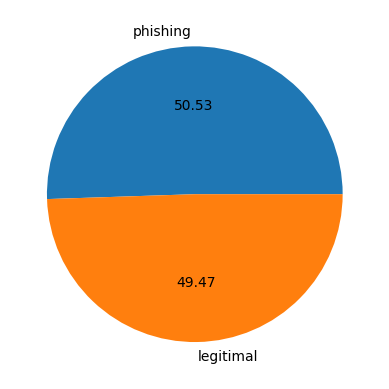

In [4]:
print(df["is_phishing"].value_counts())
pyp.pie(df["is_phishing"].value_counts(), labels = ["phishing", "legitimal"], autopct = "%0.2f")
pyp.show()

In [5]:
df.isnull().sum()

url            0
is_phishing    0
dtype: int64

In [6]:
df["len_url"] = df["url"].apply(lambda x: len(x))
df["contains_subscribe"] = df["url"].apply(lambda x: 1 if "subscribe" in x else 0)
df["contains_hash"] = df["url"].apply(lambda x: 1 if "#" in x else 0)
df["num_digits"] = df["url"].apply(lambda x: len("".join(_ for _ in x if _.isdigit())))
df["non_https"] = df["url"].apply(lambda x: 0 if "https" in x else 1)
df["num_words"] = df["url"].apply(lambda x: len(x.split('/')))
df

,url,is_phishing,len_url,contains_subscribe,contains_hash,num_digits,non_https,num_words
0,http://wilsajamco.com/9c/GoogleD/dld/us/,yes,40,0,0,1,1,8
1,http://diamond-cutz.com/,no,24,0,0,0,1,4
2,https://www.xfinity.com/internet-service,no,40,0,0,0,0,4
3,http://www.dfmudancasefretes.com.br/Bruceigles...,yes,55,0,0,0,1,6
4,https://en.wikipedia.org/wiki/Numerical_control,no,47,0,0,0,0,5
...,...,...,...,...,...,...,...,...
73570,http://hariompackers.com/loser/Alibaba/viewtra...,yes,108,0,0,0,0,9
73571,http://www.alphaconsultinggrp.com/examples/ver...,yes,58,0,0,0,1,8
73572,http://www.arbitron.com/downloads/publicradiot...,no,59,0,0,4,1,5
73573,http://unesdoc.unesco.org/images/0015/001528/1...,no,56,0,0,16,1,7


In [7]:
import plotly.express as px
fig = px.histogram(df, x="len_url", color="is_phishing")
fig.update_layout(title= "URLs length by Phishing / Legitimate", xaxis_title="URL length", yaxis_title="", plot_bgcolor="#fff", showlegend=False)
fig.show()

In [8]:
fig = px.histogram(df, x="num_digits", color="is_phishing")
fig.update_layout(title= "URLs Digits Counts by Phishing / Phishing", xaxis_title="Number of digits", yaxis_title="", plot_bgcolor="#fff", showlegend=False)
fig.show()

In [9]:
fig = px.histogram(df, x="num_words", color="is_phishing")
fig.update_layout(title= "URLs Number of Words by Phishing / Phishing", xaxis_title="Number of Words", yaxis_title="", plot_bgcolor="#fff", showlegend=False)
fig.show()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73575 entries, 0 to 73574
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   url                 73575 non-null  object
 1   is_phishing         73575 non-null  object
 2   len_url             73575 non-null  int64 
 3   contains_subscribe  73575 non-null  int64 
 4   contains_hash       73575 non-null  int64 
 5   num_digits          73575 non-null  int64 
 6   non_https           73575 non-null  int64 
 7   num_words           73575 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 4.5+ MB


In [11]:
col_names = ["is_phishing", "len_url", "contains_subscribe", "contains_hash", "num_digits", "non_https", "num_words"]
for col in col_names:
    print(df[col].value_counts())

is_phishing
yes    37175
no     36400
Name: count, dtype: int64
len_url
43      1810
45      1593
42      1528
44      1497
50      1450
        ... 
337        1
351        1
3992       1
331        1
341        1
Name: count, Length: 360, dtype: int64
contains_subscribe
0    73550
1       25
Name: count, dtype: int64
contains_hash
0    73270
1      305
Name: count, dtype: int64
num_digits
0      42669
1       4744
2       3240
4       2896
6       2308
       ...  
142        1
118        1
185        1
107        1
148        1
Name: count, Length: 137, dtype: int64
non_https
1    59247
0    14328
Name: count, dtype: int64
num_words
5     20987
6     18046
7     11017
4      9867
8      6533
9      3268
10     1856
11      962
12      250
1       182
15      173
13      161
14       88
3        77
16       29
17       26
28       18
19       15
18        5
27        4
2         2
25        2
20        2
34        1
21        1
35        1
31        1
30        1
Name: count, dtype: 

In [12]:
df["is_phishing"].value_counts()

is_phishing
yes    37175
no     36400
Name: count, dtype: int64

In [13]:
df.isnull().sum()

url                   0
is_phishing           0
len_url               0
contains_subscribe    0
contains_hash         0
num_digits            0
non_https             0
num_words             0
dtype: int64

In [14]:
X = df.drop(["is_phishing", "url"], axis=1)
y = df["is_phishing"]
X

,len_url,contains_subscribe,contains_hash,num_digits,non_https,num_words
0,40,0,0,1,1,8
1,24,0,0,0,1,4
2,40,0,0,0,0,4
3,55,0,0,0,1,6
4,47,0,0,0,0,5
...,...,...,...,...,...,...
73570,108,0,0,0,0,9
73571,58,0,0,0,1,8
73572,59,0,0,4,1,5
73573,56,0,0,16,1,7


In [15]:
y

0        yes
1         no
2         no
3        yes
4         no
        ... 
73570    yes
73571    yes
73572     no
73573     no
73574    yes
Name: is_phishing, Length: 73575, dtype: object

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [17]:
X_train.shape, X_test.shape

((49295, 6), (24280, 6))

In [18]:
X_train.dtypes

len_url               int64
contains_subscribe    int64
contains_hash         int64
num_digits            int64
non_https             int64
num_words             int64
dtype: object

In [19]:
X_train.head()

,len_url,contains_subscribe,contains_hash,num_digits,non_https,num_words
46120,44,0,0,0,1,8
5733,65,0,0,6,0,7
36661,23,0,0,0,1,4
69540,67,0,0,3,1,4
49693,75,0,0,0,1,9


In [20]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

from sklearn.metrics import accuracy_score
print('Model accurancy score with 10 decision-trees: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

Model accurancy score with 10 decision-trees: 0.8262


In [21]:
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)
rfc_100.fit(X_train, y_train)

y_pred = rfc_100.predict(X_test)

from sklearn.metrics import accuracy_score
print('Model accurancy score with 10 decision-trees: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

Model accurancy score with 10 decision-trees: 0.8262


In [22]:
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [23]:
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

len_url               0.277628
num_words             0.269890
non_https             0.246152
num_digits            0.205024
contains_hash         0.000734
contains_subscribe    0.000573
dtype: float64

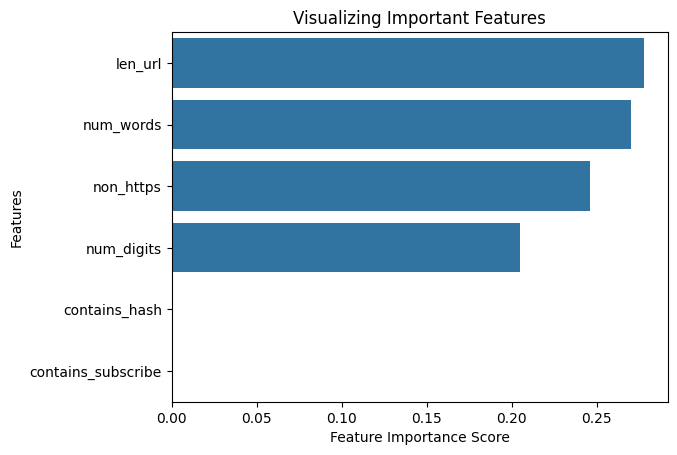

In [25]:
import matplotlib.pyplot as plt
sns.barplot(x=feature_scores, y=feature_scores.index)

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizing Important Features')

plt.show()

In [26]:
X = df.drop(['url', 'is_phishing', 'contains_hash'], axis=1)
y = df['is_phishing']

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

from sklearn.ensemble import RandomForestClassifier
rfc_100 = RandomForestClassifier(n_estimators=10, random_state=0)
rfc_100.fit(X_train, y_train)

y_pred = rfc_100.predict(X_test)

from sklearn.metrics import accuracy_score
print('Model accurancy score with 10 decision-trees: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

Model accurancy score with 10 decision-trees: 0.8247


Model accurancy score with 10 decision-trees: 0.8247


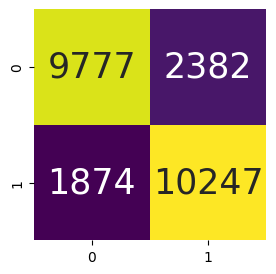

In [29]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (3,3))
sns.heatmap(cm, annot=True, annot_kws={"size": 25}, fmt="d", cmap="viridis", cbar=False)
print('Model accurancy score with 10 decision-trees: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))
plt.show()